# 3. Merging Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['font.size'] = 12
plt.rcParams['legend.frameon'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

In [3]:
%config InlineBackend.figure_format = 'retina'

## Load in Penn World Tables

Let's start by loading in the Penn World Tables Data

In [4]:
usecols = ['year', 'countrycode', 'rgdpna', 'pop', 'hc', 'avh']
pwt = pd.read_excel('data/pwt100.xlsx', sheet_name='Data', usecols=usecols)
pwt.dropna().head()

,countrycode,year,pop,avh,hc,rgdpna
350,ARG,1950,17.091824,2034.000000,1.816503,196688.453125
351,ARG,1951,17.457578,2037.866753,1.830769,208305.203125
352,ARG,1952,17.815967,2041.740856,1.845147,195898.250000
353,ARG,1953,18.168618,2045.622325,1.859638,204164.875000
354,ARG,1954,18.517168,2049.511172,1.874243,210812.562500


## Load in World Bank inequality data

Now we load in a second dataset that we wish to merge with the PWT. Here we will use the World Bank data on global inequality, which has Gini coefficient data for a larget set of countries over many years.

In [5]:
gini = pd.read_excel('data/world_bank_gini.xls')
gini.head()

,countrycode,year,gini
0,AGO,2008,42.7
1,ALB,1996,27.0
2,ALB,2002,31.7
3,ALB,2005,30.6
4,ALB,2008,30.0


We can see that the World Bank data doesn't appear every year for many countries.

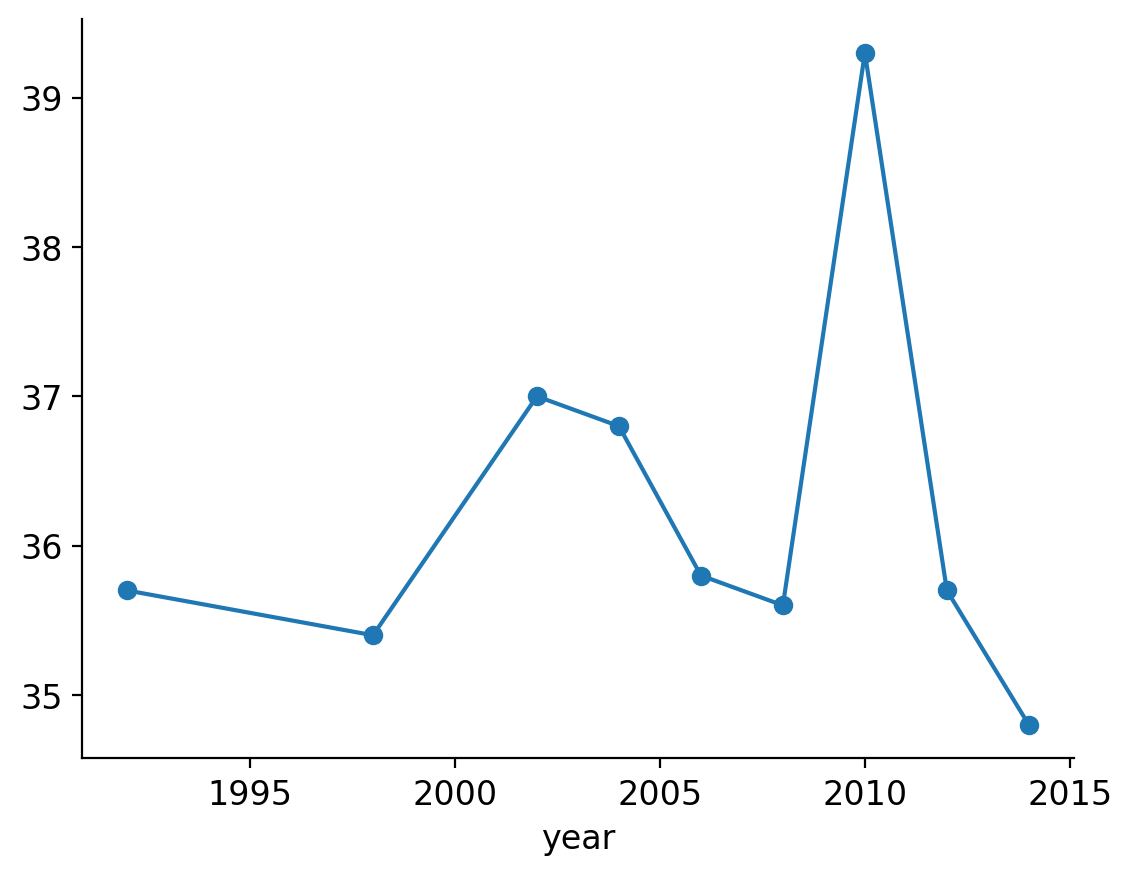

In [6]:
gini_pan = gini.pivot(index='year', columns='countrycode', values='gini')
gini_pan['VNM'].dropna().plot(marker='o');

## Merge the two together

Finally, we want to merge these two together. To do this, we will match any rows that have the same value for both `year` and `countrycode`.

In [7]:
full = pd.merge(pwt, gini, how='left', on=('year', 'countrycode'))
full.dropna().head()

,countrycode,year,pop,avh,hc,rgdpna,gini
380,ARG,1980,27.896528,1974.000000,2.250048,500260.78125,40.8
386,ARG,1986,30.698964,1898.608848,2.441888,485108.68750,42.8
387,ARG,1987,31.184415,1886.326616,2.463388,497395.50000,45.3
391,ARG,1991,33.079000,1837.960827,2.552568,494384.53125,46.8
392,ARG,1992,33.529326,1826.000000,2.570974,545328.43750,45.5


Now we can see how the Gini coefficient relates to other variables, like GDP per capita

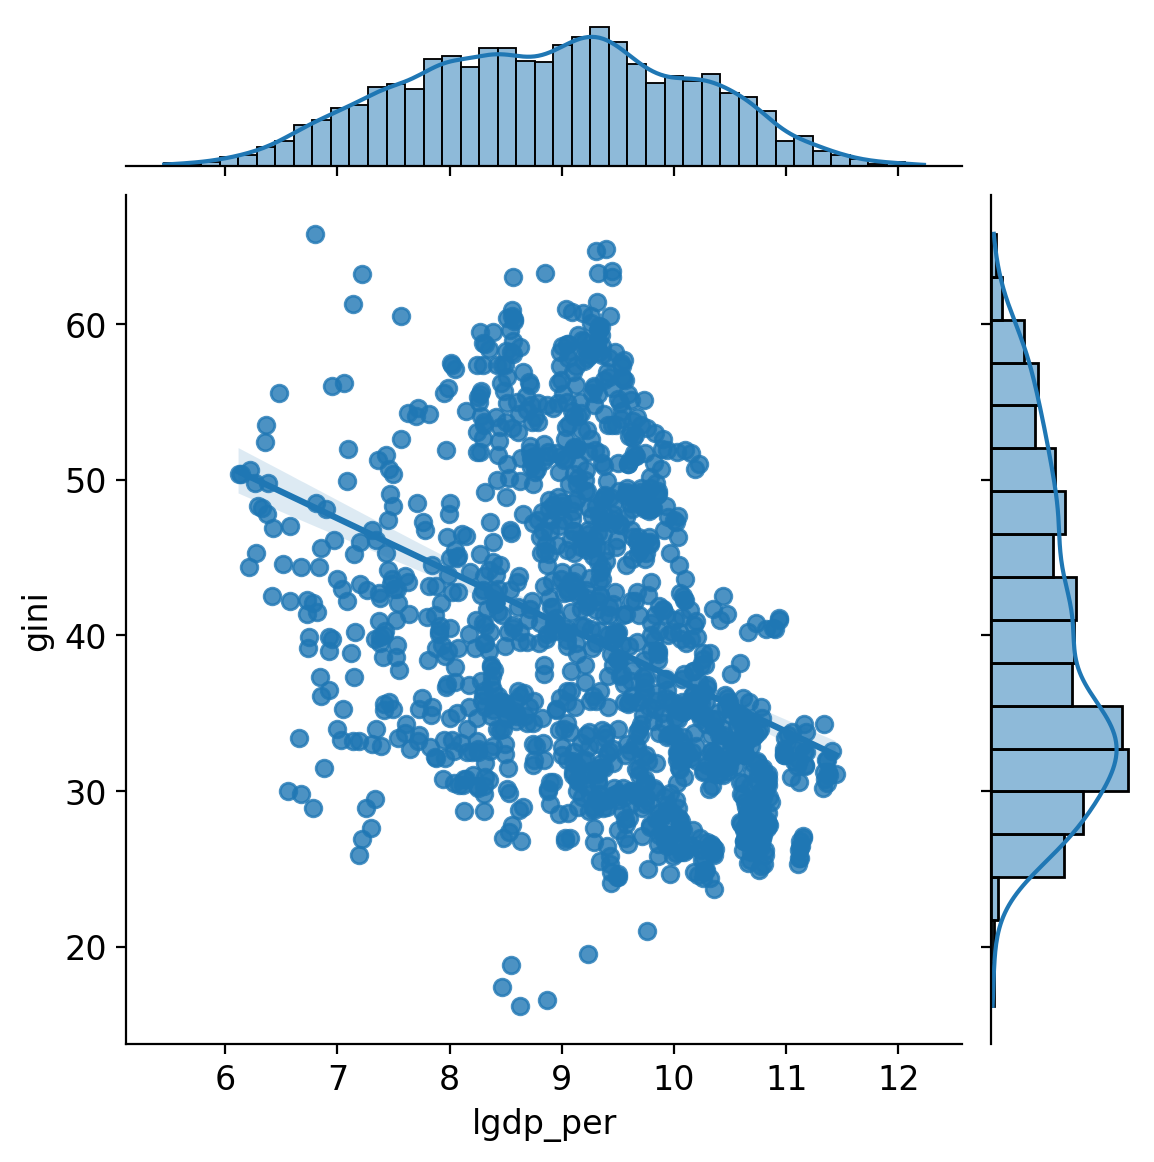

In [8]:
full['lgdp_per'] = np.log(full['rgdpna']/full['pop'])
sns.jointplot(x='lgdp_per', y='gini', kind='reg', data=full);